In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cohlib.utils import pickle_open, logistic, draw_raster_single
from cohlib.plot import draw_raster_single

In [3]:
def plot_synthetic_data(L, sample_length, C, seed, mu, fs=1000, start=0):
    T = sample_length/fs
    trange = [0,T]
    data_path = f'saved/synthetic_data/simple_synthetic_{L}_{sample_length}_{C}_{mu}_{seed}'

    data_load = pickle_open(data_path)

    spikes = data_load['observed']['spikes']

    Gamma = data_load['latent']['Gamma']
    xs = data_load['latent']['xs']
    vs = data_load['latent']['vs']
    zs = data_load['latent']['zs']
    lams = data_load['observed']['lams']

    freqs = data_load['meta']['freqs']

    swap = False
    ls = [0,1,2]
    fig,ax = plt.subplots(6,1,figsize=(12,10), sharex=True)
    ls = [l + start for l in ls]
    title_size = 16
    label_size = 14
    x = np.arange(0, sample_length) / 1000
    # for i in range(start,start+3):
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    for i, l in enumerate(ls):
    # i = 3
        ax[1].plot(x, xs[l,1,:], color=colors[i])
        # ax[1].set_ylim([-1,1])
        ax[1].margins(0)
        ax[1].set_title(r'$x_t^{2, \ell}$  $\ell = (1,2,3)$', size=title_size)
        ax[1].set_ylabel('mV', size = label_size)
        
        ax[0].plot(x, xs[l,0,:], color=colors[i])
        # ax[0].set_ylim([-1,1])
        ax[0].margins(0)
        ax[0].set_title(r'$x_t^{1, \ell}$  $\ell = (1,2,3)$', size=title_size)
        ax[0].set_ylabel('mV', size = label_size)
        
        ax[2].plot(x, lams[l,0,:], color=colors[i])
        ax[2].set_title(r'$\lambda_t^{1, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
        ax[2].margins(0)
        ax[2].set_ylabel('Intensity', size = label_size)

        ax[3].plot(x, lams[l,1,:], color=colors[i])
        ax[3].set_title(r'$\lambda_t^{2, c,\ell}$   $c = 1$  $\ell = (1,2,3)$', size=title_size)
        ax[3].margins(0)
        ax[3].set_ylabel('Intensity', size = label_size)
    # draw_raster_single(spikes[start,:,:], trange=[0,0.5], region='CPB', override_bg_color='white',ax=ax[3])
    color = colors[0]
    spike_matA = spikes[ls[0],:,0,:]
    spike_matB = spikes[ls[0],:,1,:]
    draw_raster_single(spike_matA, trange=trange, color_name=color, ax=ax[4])
    draw_raster_single(spike_matB, trange=trange, color_name=color, ax=ax[5])
    ax[4].set_title(r'$n_t^{1, c,\ell}$   $c = (1, ..., C)$   $\ell = 1$', size=title_size)
    ax[5].set_title(r'$n_t^{2, c,\ell}$   $c = (1, ..., C)$   $\ell = 1$', size=title_size)
    ax[4].set_ylabel('Spikes A', size = label_size)
    ax[5].set_ylabel('Spikes B', size = label_size)

    ax[5].set_xlabel('Time (sec)', size = label_size)
    plt.xlim([0,sample_length/fs])
    plt.tight_layout()

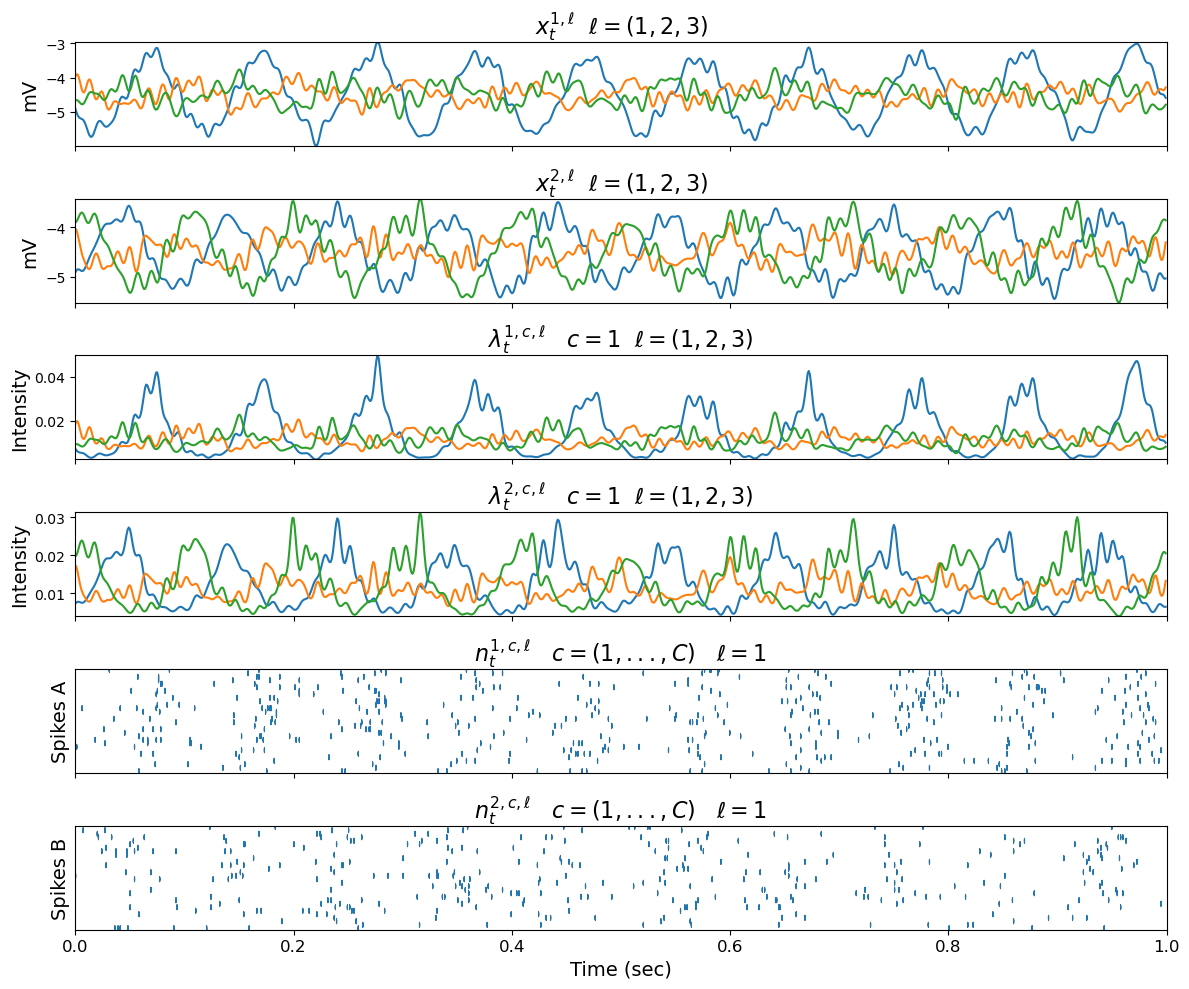

In [4]:
mu = -4.5
L = 25 
C = 30
sample_length = 1000
seed = 8
plot_synthetic_data(L, sample_length, C, seed, mu, 
start=12)



In [5]:
data_path = f'saved/synthetic_data/simple_synthetic_{L}_{sample_length}_{C}_{mu}_{seed}'
model_path = f'saved/fitted_models/simple_synthetic_{L}_{sample_length}_{C}_{mu}_{seed}_fitted'

data_load = pickle_open(data_path)
model_load = pickle_open(model_path)

In [6]:
spikes = data_load['observed']['spikes']
lams = data_load['observed']['lams']
Gamma_true = data_load['latent']['Gamma']
xs = data_load['latent']['xs']
vs = data_load['latent']['vs']
zs = data_load['latent']['zs']
Wv_data = data_load['meta']['Wv']
freqs = data_load['meta']['freqs']

Wv_model = model_load['Wv']
Wv = Wv_model

In [9]:
vs[:,:]

(25, 2, 1001)

In [43]:
vs[0,0,:201]

array([-3.58098622e+02, -1.82426933e-01,  1.04430910e+00, -1.78183457e+00,
        3.34861949e-01, -3.05877442e-02,  2.12531533e-01,  1.91057700e+00,
        1.19340097e-01,  1.51297829e+00,  4.48792573e-01,  7.00836125e-01,
        1.15063023e+00, -3.68609354e-01,  6.93151013e-01,  8.08788722e-01,
       -1.24413332e+00,  2.35210867e-01, -2.98499010e+00,  2.55185532e+01,
        9.68309284e+00,  5.64263755e-01, -4.75650684e-01,  1.66109003e+00,
       -2.50238218e+00,  7.17882458e-01,  2.64852736e+00,  1.11512288e+00,
       -1.15923929e+00,  4.15777228e-01,  1.46881079e-01, -4.40666206e-01,
        1.16588639e+00, -2.56540991e-02, -1.71714228e-01,  4.07595670e-01,
       -3.50698109e-02,  8.94260547e-02, -2.63458774e-01, -1.36898281e+00,
       -4.30297403e-01,  3.99293532e-01,  1.43429685e-01, -1.84761146e+00,
        3.61922575e-01, -1.42497404e+00, -1.01535500e+00, -1.73311897e+00,
       -5.74124103e-01, -7.88585104e-01, -1.26364151e-01,  2.55642784e+00,
       -4.35831597e-01, -

In [45]:
xtemps = np.apply_along_axis(lambda v: Wv @ v, 2, vs[:,:,:99])

In [47]:
from cohlib.utils import get_dcval
get_dcval(mu, 500, 'complex')

-179.04931097838227

In [11]:
zs[:,:,0]

array([[-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.04931098+0.j, -179.04931098+0.j],
       [-179.

In [12]:
xs.mean(2)

array([[-4.49139883, -4.48976109],
       [-4.49217236, -4.49102949],
       [-4.49039919, -4.49309079],
       [-4.49112831, -4.48980483],
       [-4.48869603, -4.49225   ],
       [-4.49066967, -4.49254866],
       [-4.49001105, -4.492822  ],
       [-4.49050745, -4.48922771],
       [-4.48982166, -4.49229972],
       [-4.49178433, -4.49064013],
       [-4.49292867, -4.49042308],
       [-4.49017053, -4.4911333 ],
       [-4.49053944, -4.4900395 ],
       [-4.49174   , -4.49175894],
       [-4.49055451, -4.49220946],
       [-4.49114316, -4.4932736 ],
       [-4.49164606, -4.48900888],
       [-4.49234756, -4.49104102],
       [-4.49466172, -4.49007668],
       [-4.49039901, -4.48903678],
       [-4.48982188, -4.49146977],
       [-4.48978398, -4.49025003],
       [-4.48987486, -4.49113659],
       [-4.48927921, -4.49040091],
       [-4.4911584 , -4.4926334 ]])

In [12]:
Wv.shape

(1000, 999)

In [13]:
freqs_mod = freqs[:int((Wv.shape[1] - 1) / 2)]
freqs_mod_dc = np.insert(freqs_mod, 0, 0)

In [14]:
zs_outer = np.einsum('ijk,imk->kjmi', zs[:,:,:], zs[:,:,:].conj())
zs_outer_mean = zs_outer.mean(3)
vs_outer = np.einsum('ijk,imk->kjmi', vs[:,:,:], vs[:,:,:].conj())
vs_outer_mean = vs_outer.mean(3)

In [15]:
from cohlib.utils import conv_v_to_z, conv_z_to_v
import numpy as np
from numpy.fft import rfft
zf_x = rfft(xs, axis=2)
v_x = np.apply_along_axis(lambda x: Wv.T @ x, 2, xs)
z_x = conv_v_to_z(v_x, axis=2, dc=True)
v_x2 = conv_z_to_v(z_x, axis=2, dc=True)

In [16]:
# can we get Gamma back from z's? 
zs.shape
zs_outer = np.einsum('ijk,imk->kjmi', zs[:,:,1:], zs[:,:,1:].conj())
zs_outer_mean = zs_outer.mean(3)
zs_outer_mean.shape

(500, 2, 2)

In [17]:
def Gamma_est_from_zs(zs, dc=True):
    if dc is True:
        zs_outer = np.einsum('ijk,imk->kjmi', zs[:,:,1:], zs[:,:,1:].conj())
    else:
        zs_outer = np.einsum('ijk,imk->kjmi', zs, zs.conj())
    zs_outer_mean = zs_outer.mean(3)
    return zs_outer_mean

(25, 2, 501)

In [19]:
# from cohlib.mvcn import sample_zs_from_Gamma
# zsamps = sample_zs_from_Gamma(Gamma_true, 500)
# Gamma_est = Gamma_est_from_zs(zsamps, dc=False)
Gamma_est = Gamma_est_from_zs(zs[:,:,1:], dc=False)

In [20]:
np.round(Gamma_true[9,:,:], 4)

array([[1500.       +0.j    , -436.6078-1309.1118j],
       [-436.6078+1309.1118j, 1500.       +0.j    ]])

In [21]:
np.round(Gamma_est[9,:,:],4)

array([[1239.5919   +0.j    , -325.8242-1148.3072j],
       [-325.8242+1148.3072j, 1314.9532   +0.j    ]])

In [22]:
from cohlib.utils import conv_v_to_z
zvs = conv_v_to_z(vs[:,:,1:], axis=2,dc=False)
np.all(np.isclose(zs[:,:,1:], zvs))

True

In [23]:
Gamma_est_zv = Gamma_est_from_zs(zvs, dc=False)
np.round(Gamma_est_zv[9,:,:],4)

array([[1239.5919   +0.j    , -325.8242-1148.3072j],
       [-325.8242+1148.3072j, 1314.9532   +0.j    ]])

In [24]:
invWv = np.linalg.pinv(Wv)

In [25]:
np.linalg.norm(Wv.T @ Wv, 2)

0.1573351664207172

In [26]:
# great! now we need x 
# xinvs = np.apply_along_axis(lambda x: Wv[:,1:].T @ x, 2, xs)
xinvs = np.apply_along_axis(lambda x: Wv.T @ x, 2, xs)
xinvs_norm = np.apply_along_axis(lambda x: invWv @ x, 2, xs)

In [27]:
zxs = conv_v_to_z(xinvs[:,:,1:], axis=2,dc=False)
zxs_norm = conv_v_to_z(xinvs_norm[:,:,1:], axis=2,dc=False)
Gamma_est_zx = Gamma_est_from_zs(zxs, dc=False)
Gamma_est_zx_norm = Gamma_est_from_zs(zxs_norm, dc=False)

In [29]:
thr_true.shape

(500,)

(0.0, 49.0)

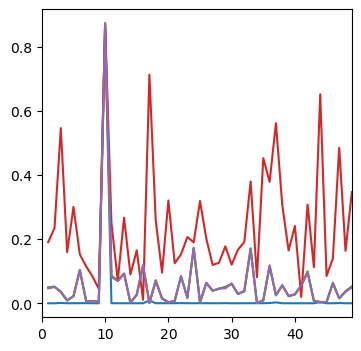

In [53]:
from cohlib.estimation import thr_coherence
fig, ax = plt.subplots(figsize=(4,4))
thr_true = thr_coherence(Gamma_true)
thr_estz = thr_coherence(Gamma_est)
thr_estzv = thr_coherence(Gamma_est_zv)
thr_estzx = thr_coherence(Gamma_est_zx)
thr_estzx_norm = thr_coherence(Gamma_est_zx_norm)

ax.plot(freqs,thr_true)
ax.plot(freqs,thr_estz)
ax.plot(freqs,thr_estzv)
ax.plot(freqs[:49],thr_estzx)
ax.plot(freqs[:49],thr_estzx_norm)
ax.set_xlim([0,49])

(0.0, 49.0)

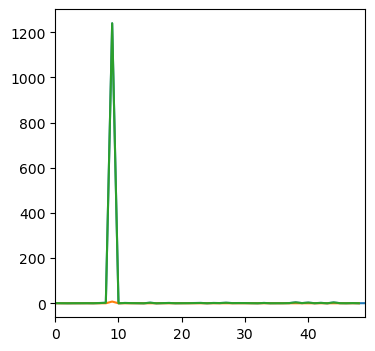

In [57]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(Gamma_est[:,0,0].real)
ax.plot(Gamma_est_zx[:,0,0].real)
ax.plot(Gamma_est_zx_norm[:,0,0].real)
ax.set_xlim([0,49])

In [30]:
from cohlib.alg.transform import construct_real_idft_mod
sample_length = Wv_data.shape[0]
J_orig = int((Wv_data.shape[1] - 1) / 2)
J_new = J_orig - 100
fs = 1000

Wv = construct_real_idft_mod(sample_length, J_orig, J_new, fs)

In [31]:
Wv.shape

(1000, 801)

In [32]:
invWv = np.linalg.pinv(Wv)

In [33]:
np.linalg.norm(Wv.T @ Wv, 2)

0.157440158170953

In [34]:
# great! now we need x 
# xinvs = np.apply_along_axis(lambda x: Wv[:,1:].T @ x, 2, xs)
xinvs = np.apply_along_axis(lambda x: Wv.T @ x, 2, xs)
xinvs_norm = np.apply_along_axis(lambda x: invWv @ x, 2, xs)

In [35]:
zxs = conv_v_to_z(xinvs[:,:,1:], axis=2,dc=False)
zxs_norm = conv_v_to_z(xinvs_norm[:,:,1:], axis=2,dc=False)
Gamma_est_zx = Gamma_est_from_zs(zxs, dc=False)
Gamma_est_zx_norm = Gamma_est_from_zs(zxs_norm, dc=False)

(0.0, 100.0)

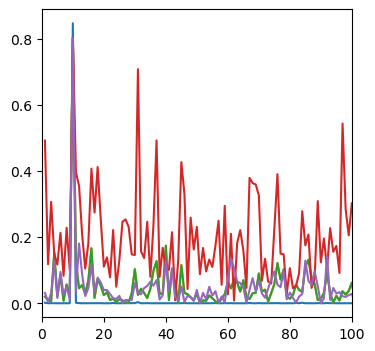

In [36]:
from cohlib.estimation import thr_coherence
fig, ax = plt.subplots(figsize=(4,4))
thr_true = thr_coherence(Gamma_true)
thr_estz = thr_coherence(Gamma_est)
thr_estzv = thr_coherence(Gamma_est_zv)
thr_estzx = thr_coherence(Gamma_est_zx)
thr_estzx_norm = thr_coherence(Gamma_est_zx_norm)

ax.plot(freqs,thr_true)
ax.plot(freqs,thr_estz)
ax.plot(freqs,thr_estzv)
ax.plot(freqs[:400],thr_estzx)
ax.plot(freqs[:400],thr_estzx_norm)
ax.set_xlim([0,100])

(0.0, 100.0)

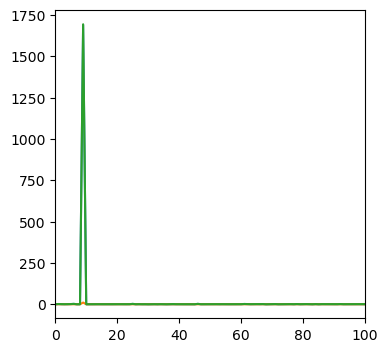

In [37]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(Gamma_est[:,0,0].real)
ax.plot(Gamma_est_zx[:,0,0].real)
ax.plot(Gamma_est_zx_norm[:,0,0].real)
ax.set_xlim([0,100])

In [38]:
vs[0,:,:]

array([[-2.78521150e+02, -3.00588183e-02, -1.97037814e-01, ...,
         1.49274857e+00,  1.09808633e+00,  1.18292908e+00],
       [-2.78521150e+02,  1.58073497e-01,  1.00466574e+00, ...,
         1.41722580e+00, -1.00585970e+00, -1.08201652e+00]])

In [61]:
from cohlib.alg.em_sgc import transform_cov_c2r
Gamma_true_r = np.stack([transform_cov_c2r(Gamma_true[j,:,:]) for j in range(500)])

In [98]:
Gamma_est_r = model_load['track'][3]['real']
Gamma_est_r.shape

(499, 4, 4)

In [101]:
i = 30
print(np.round(Gamma_est_r[i,:,:], 4))
print(np.round(Gamma_true_r[9,:,:], 4))
# next - invert Gamma_true_r; confirm it's the same as inverting Gamma_true_c -> converting
# use inverse Gamma_true_r in 'full' form to initialize algorithm... see where it takes it

[[ 0.0203  0.      0.     -0.    ]
 [ 0.      0.0202 -0.      0.    ]
 [ 0.     -0.      0.0203  0.    ]
 [-0.      0.      0.      0.0204]]
[[ 750.      612.1793   -0.     -318.3339]
 [ 612.1793  750.      318.3339   -0.    ]
 [   0.      318.3339  750.      612.1793]
 [-318.3339    0.      612.1793  750.    ]]


[[ 8.20e-03  1.70e-03 -0.00e+00 -2.00e-04]
 [ 1.70e-03  2.15e-01  2.00e-04 -0.00e+00]
 [ 0.00e+00  2.00e-04  8.20e-03  1.70e-03]
 [-2.00e-04  0.00e+00  1.70e-03  2.15e-01]]


In [57]:
invest = np.linalg.pinv(Gammafullr_est)

In [41]:
vs[0,0,0]**2

77574.03122616487

In [43]:
test.shape

(25, 2002, 2002)